In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import os
import csv
from scipy.stats import linregress


# Import API key
from api_keys import api_key

# set up the query URL
#api_key = api_keys.api_key
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=' + api_key

print(url)
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = (os.path.join('cities.csv'))

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb


In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500) # change to 1500 at end
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # replace space with a '%20' to correct the URL
    city = city.replace(' ', '%20')
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count & check lat lon output
#len(cities)
#cities
#print([lat_lng for lat_lng in zip(lats, lngs)])

In [8]:
# PERFORM TEST API CALL
response = requests.get(f'{url}&q={city}').json()
# test response
#response

In [9]:

# Create emtpty lists to append all of the called API data into
cityName = []
country = []
date = []
tempF = []
humidity = []
clouds = []
windMPH = []
lat = []
lon = []

# initiate call counter
count = 1

# Logging statement
print(f'Retrieving Data')
print(f'-------------------------------')

# loop through all cities
for city in cities:
    
    # Set up a try loop in case coordinates generated have no city associated
    try:
        response = requests.get(f'{url}&q={city}').json()
        cityName.append(response['name'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        tempF.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        windMPH.append(response['wind']['speed'])
        cityRecord = (response['name'])
        print(f'Record Processing  {count} | {cityRecord}')
        print(f'{url}&q={city}')
        # Increase counter by one 
        count= count + 1
        # Wait a second in loop to not over exceed rate limit
        time.sleep(1.01)
    except:
        print('City not found...skipping...')
    # If no record found "skip" to next call
    continue

Retrieving Data
-------------------------------
Record Processing  1 | Esperance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=esperance
Record Processing  2 | Hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=hermanus
Record Processing  3 | Provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=provideniya
Record Processing  4 | Coquimbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=coquimbo
Record Processing  5 | Saint-Philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=saint-philippe
Record Processing  6 | Dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=dikson
Record Processing  7 | Leshukonskoye
http://api.openweathermap.org/data/

Record Processing  56 | Moussoro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=moussoro
Record Processing  57 | Jumla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=jumla
Record Processing  58 | Adrar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=adrar
Record Processing  59 | Los Llanos de Aridane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=los%20llanos%20de%20aridane
Record Processing  60 | Luanda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=luanda
Record Processing  61 | Takoradi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=takoradi
Record Processing  62 | Samokov
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8

Record Processing  111 | San Fernando
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=san%20fernando
Record Processing  112 | Fort Nelson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=fort%20nelson
Record Processing  113 | Katobu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=katobu
Record Processing  114 | Kloulklubed
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=kloulklubed
Record Processing  115 | Hokitika
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=hokitika
Record Processing  116 | Heinola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=heinola
Record Processing  117 | Broken Hill
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=9

Record Processing  167 | Narasannapeta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=narasannapeta
Record Processing  168 | Butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=butaritari
Record Processing  169 | Bridlington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=bridlington
Record Processing  170 | Katsuura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=katsuura
Record Processing  171 | Cambrils
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=cambrils
Record Processing  172 | Aden
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=aden
Record Processing  173 | Iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341

Record Processing  222 | Silver City
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=silver%20city
Record Processing  223 | Puerto del Rosario
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=puerto%20del%20rosario
Record Processing  224 | Lukovetskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=lukovetskiy
Record Processing  225 | Razole
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=razole
Record Processing  226 | Cayenne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=cayenne
Record Processing  227 | Saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=saldanha
Record Processing  228 | Puerto Escondido
http://api.openweathermap.org/data/2.5/weather?uni

Record Processing  277 | Ambulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=ambulu
Record Processing  278 | Kilindoni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=kilindoni
Record Processing  279 | Lata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=lata
City not found...skipping...
Record Processing  280 | Huilong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=huilong
Record Processing  281 | Urucara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=urucara
Record Processing  282 | Garowe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=garowe
Record Processing  283 | Chamba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec

Record Processing  332 | Shahr-e Kord
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=shahr-e%20kord
Record Processing  333 | San Andres
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=san%20andres
Record Processing  334 | Bani Walid
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=bani%20walid
Record Processing  335 | Balma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=balma
Record Processing  336 | Benguela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=benguela
Record Processing  337 | Sao Jose da Coroa Grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=sao%20jose%20da%20coroa%20grande
Record Processing  338 | Shiyan
http://api.openweathermap.org/data/2

Record Processing  387 | Talcahuano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=talcahuano
Record Processing  388 | Bluefields
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=bluefields
Record Processing  389 | Russell
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=russell
Record Processing  390 | Yanam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=yanam
Record Processing  391 | Yanliang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=yanliang
Record Processing  392 | Point Fortin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=point%20fortin
Record Processing  393 | Salmas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8

Record Processing  442 | Puerto Colombia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=puerto%20colombia
City not found...skipping...
Record Processing  443 | Altay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=altay
Record Processing  444 | Acapulco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=acapulco
Record Processing  445 | Ambon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=ambon
Record Processing  446 | Vao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=vao
Record Processing  447 | Tarauaca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=tarauaca
Record Processing  448 | Moose Factory
http://api.openweathermap.org/data/2.5/weather?units=Imperial&

Record Processing  497 | Belaya Gora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=belaya%20gora
City not found...skipping...
Record Processing  498 | Vardo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=vardo
Record Processing  499 | Monrovia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=monrovia
Record Processing  500 | Khorixas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=khorixas
Record Processing  501 | Upata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=upata
Record Processing  502 | Marsa Matruh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=98f7a319341ec8aca81a476921a8cfbb&q=marsa%20matruh
Record Processing  503 | Menongue
http://api.openweathermap.org/data/2.5/weather?units=Im

In [10]:
weatherDictionary = {'Country': country, 'City': cityName, 
                     'Date': date, 'Temperature': tempF, 'Cloud Density': clouds,
                     'Humidity': humidity, 'Humidity': humidity, 'Wind(MPH)': windMPH,
                     'Latitude': lat, 'Longitude': lon}
weatherDF = pd.DataFrame(weatherDictionary)

weatherDF.to_csv(os.path.join('weatherData.csv'))
weatherDF.head()

,Country,City,Date,Temperature,Cloud Density,Humidity,Wind(MPH),Latitude,Longitude
0,AU,Esperance,1570101548,59.00,90,77,11.41,-33.86,121.89
1,ZA,Hermanus,1570101549,68.00,0,75,10.00,-34.42,19.24
2,RU,Provideniya,1570101550,32.32,99,79,7.00,64.42,-173.23
3,CL,Coquimbo,1570101551,48.20,0,81,3.36,-29.95,-71.34
4,CA,Saint-Philippe,1570101553,41.00,1,93,7.54,45.36,-73.48


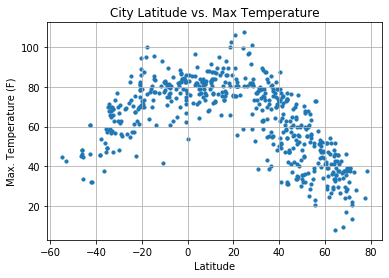

In [11]:

# Build scatterplot using column headers for hte X then Y Axis
plt.scatter(weatherDF['Latitude'], weatherDF['Temperature'], marker='o', s=10)
# add other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# save graph
plt.savefig(os.path.join('temperature-VS-latitude.png'))
# Show graph
plt.show()

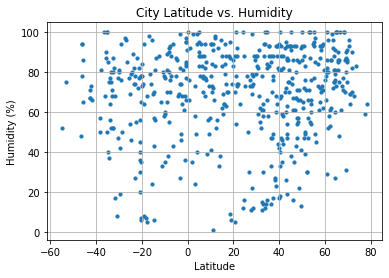

In [12]:

# Build a scatter plot for each data type
plt.scatter(weatherDF["Latitude"], weatherDF["Humidity"], marker="o", s=10)
# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig(os.path.join('humidity-VS-latitude.png'))
# Show plot
plt.show()

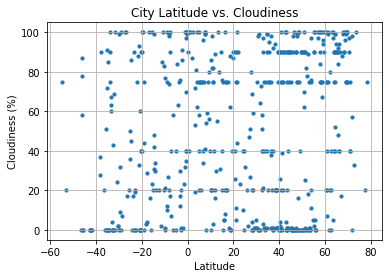

In [13]:

# Build a scatter plot for each data type
plt.scatter(weatherDF['Latitude'], weatherDF['Cloud Density'], marker="o", s=10)
# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig(os.path.join('cloudDeinsity-VS-latitude.png'))
# Show plot
plt.show()

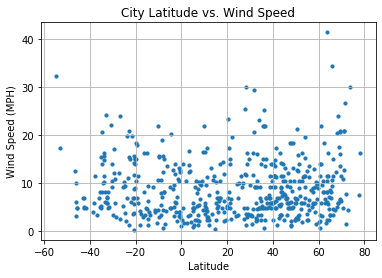

In [14]:

# Build a scatter plot for each data type
plt.scatter(weatherDF['Latitude'], weatherDF['Wind(MPH)'], marker='o', s=10)
# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.ylabel('Wind Speed (MPH)')
plt.xlabel('Latitude')
plt.grid(True)
# Save the figure
plt.savefig(os.path.join('windSpeed-VS-latitude.png'))
# Show plot
plt.show()

In [15]:
north = weatherDF[weatherDF['Latitude'] >= 0]
south = weatherDF[weatherDF['Latitude'] < 0]

The r-squared is -0.7954848919832245
The regression expression is:  Y = -0.8211078712691864*x + 93.39898867778598
The p-value is 1.3596522304775043e-83


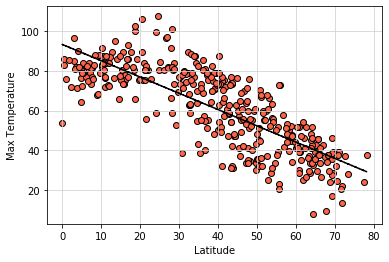

In [24]:
# Defining the variables
lat_n = north["Latitude"]
max_temp_n = north["Temperature"]

# creating the chart
slope, intercept, r_value, p_value, std_err = linregress(lat_n, max_temp_n)
regression = slope * lat_n + intercept
plt.scatter(lat_n, max_temp_n, edgecolors="black",facecolors="tomato")
plt.plot(lat_n,regression,"--", color = "black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig(os.path.join('Regression(north)_Lat_vs_MaxTemp(fig5).png'))

# Show plot
print(f"The r-squared is {r_value}")
print(f"The regression expression is:  Y = {slope}*x + {intercept}")
print(f"The p-value is {p_value}")
plt.show()

The r-squared is 0.7018796071664969
The regression expression is:  Y = 0.734841888455011*x + 85.01190162698248
The p-value is 4.712270868688462e-25


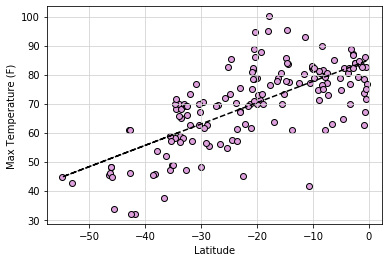

In [17]:
# Defining the variables
lat_s = south["Latitude"]
max_temp_s = south["Temperature"]

# creating the chart
slope, intercept, r_value, p_value, std_err = linregress(lat_s, max_temp_s)
regression = slope * lat_s + intercept
plt.scatter(lat_s, max_temp_s ,edgecolors="black",facecolors="plum")
plt.plot(lat_s,regression,"--", color = "black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig(os.path.join('Regression(south)_Lat_vs_MaxTemp(fig6).png'))

# Show plot
print(f"The r-squared is {r_value}")
print(f"The regression expression is:  Y = {slope}*x + {intercept}")
print(f"The p-value is {p_value}")
plt.show()

The r-squared is 0.0627059657598703
The regression expression is:  Y = 0.07288750440429442*x + 67.40143629511006
The p-value is 0.22448731330220398


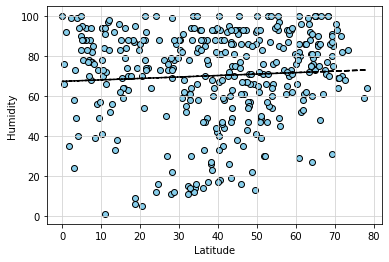

In [25]:
#  Defining the variables
lat_n = north["Latitude"]
humid_n = north["Humidity"]

# creating the chart
slope, intercept, r_value, p_value, std_err = linregress(lat_n, humid_n)
regression = slope * lat_n + intercept
plt.scatter(lat_n, humid_n ,edgecolors="black",facecolors="skyblue")
plt.plot(lat_n,regression,"--", color = "black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig(os.path.join('Regression(north)_Lat_vs_Humidity(fig7).png'))

# Show plot
print(f"The r-squared is {r_value}")
print(f"The regression expression is:  Y = {slope}*x + {intercept}")
print(f"The p-value is {p_value}")
plt.show()

The r-squared is 0.03879702499787512
The regression expression is:  Y = 0.06652050015705503*x + 68.29276419099405
The p-value is 0.626199162821435


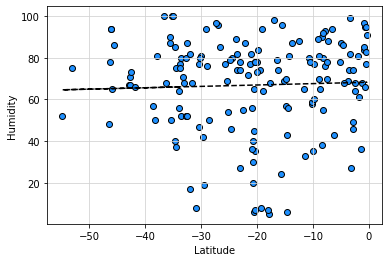

In [26]:
# Defining the variables
lat_s = south["Latitude"]
humid_s = south["Humidity"]

# creating the chart
slope, intercept, r_value, p_value, std_err = linregress(lat_s, humid_s)
regression = slope * lat_s + intercept
plt.scatter(lat_s, humid_s ,edgecolors="black",facecolors="dodgerblue")
plt.plot(lat_s,regression,"--", color = "black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig(os.path.join('Regression(south)_Lat_vs_Humidity(fig8).png'))

# Show plot
print(f"The r-squared is {r_value}")
print(f"The regression expression is:  Y = {slope}*x + {intercept}")
print(f"The p-value is {p_value}")
plt.show()

The r-squared is 0.11721310101017811
The regression expression is:  Y = 0.22443230027611802*x + 45.08147697874942
The p-value is 0.02283640328614258


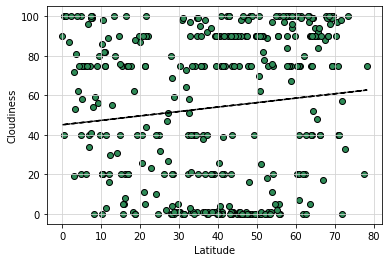

In [27]:
# Defining the variables
lat_n = north["Latitude"]
cloud_n = north["Cloud Density"]

# creating the chart
slope, intercept, r_value, p_value, std_err = linregress(lat_n, cloud_n)
regression = slope * lat_n + intercept
plt.scatter(lat_n, cloud_n ,edgecolors="black",facecolors="seagreen")
plt.plot(lat_n,regression,"--", color = "black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig(os.path.join('Regression(north)_Lat_vs_Cloudiness(fig9).png'))

# Show plot
print(f"The r-squared is {r_value}")
print(f"The regression expression is:  Y = {slope}*x + {intercept}")
print(f"The p-value is {p_value}")
plt.show()

The r-squared is 0.18118799999297008
The regression expression is:  Y = 0.5123746235858149*x + 51.66460403747679
The p-value is 0.021853239879334213


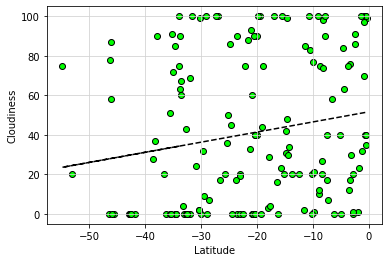

In [28]:
# Defining the variables
lat_s = south["Latitude"]
cloud_s = south["Cloud Density"]

# creating the chart
slope, intercept, r_value, p_value, std_err = linregress(lat_s, cloud_s)
regression = slope * lat_s + intercept
plt.scatter(lat_s, cloud_s ,edgecolors="black",facecolors="lime")
plt.plot(lat_s,regression,"--", color = "black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig(os.path.join('Regression(south)_Lat_vs_Cloudiness(fig10).png'))

# Show plot
print(f"The r-squared is {r_value}")
print(f"The regression expression is:  Y = {slope}*x + {intercept}")
print(f"The p-value is {p_value}")
plt.show()

The r-squared is 0.16734340739633924
The regression expression is:  Y = 0.050738618663652604*x + 6.640100406301335
The p-value is 0.001108403551419827


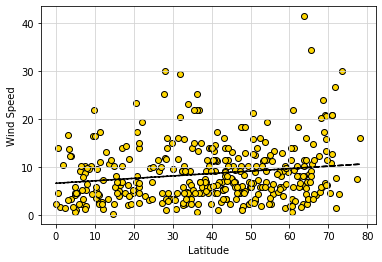

In [29]:

# Defining the variables
lat_n = north["Latitude"]
wind_n = north["Wind(MPH)"]

# creating the chart
slope, intercept, r_value, p_value, std_err = linregress(lat_n, wind_n)
regression = slope * lat_n + intercept
plt.scatter(lat_n, wind_n ,edgecolors="black",facecolors="gold")
plt.plot(lat_n,regression,"--", color = "black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgray")

# Save the figure
plt.savefig(os.path.join('Regression(north)_Lat_vs_Wind_Speed(fig11).png'))
# plt.savefig("../Images/Regression(north)_Lat_vs_Wind_Speed(fig11).png")

# Show plot
print(f"The r-squared is {r_value}")
print(f"The regression expression is:  Y = {slope}*x + {intercept}")
print(f"The p-value is {p_value}")
plt.show()

The r-squared is -0.144995899422737
The regression expression is:  Y = -0.06264986819744872*x + 7.635185647447598
The p-value is 0.06734442298519021


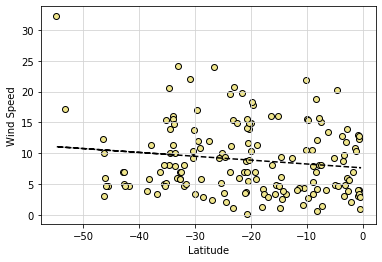

In [30]:
# Defining the variables
lat_s = south["Latitude"]
wind_s = south["Wind(MPH)"]

# creating the chart
slope, intercept, r_value, p_value, std_err = linregress(lat_s, wind_s)
regression = slope * lat_s + intercept
plt.scatter(lat_s, wind_s ,edgecolors="black",facecolors="khaki")
plt.plot(lat_s,regression,"--", color = "black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig(os.path.join('Regression(north)_Lat_vs_Wind_Speed(fig11).png'))

# Show plot
print(f"The r-squared is {r_value}")
print(f"The regression expression is:  Y = {slope}*x + {intercept}")
print(f"The p-value is {p_value}")
plt.show()

WeatherPy

Analysis

Weather becomes warmer when approaching the equator and pulling in data at this time of year shows that the Southern Hemisphere on average is warmer than the Northern, due to the tilt of the earth.
There is no strong correlation between latitude and cloudiness or wind.
It is interesting to see that there does not appear to be any correlation between Latitude and Humidity either, despite a clear correlation between Latitude and Temperature.